<a href="https://colab.research.google.com/github/hidemet/mldm-credit-card-risk/blob/main/myCopy_ProgettoMLDM_Dumas_Rossini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## 1. Caricamento e divisione del Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

names = [
    "Account_balance", # 1 Saldo contabile (diviso in quattro fasce)
    "Duration", # 2 (month)
    "Credit_history", # 3
    "Purpose", # 4
    "Credit_amount", # 5
    "Saving_accounts", # 6
    "Employment_length",# 7
    "Installment_rate", # 8 (% sul reddito disponibile)
    "Sex_and_Marital_status", # 9 
    "Guarantor", # 10
    "Residence_duration", # 11
    "Most_valuable_asset", # 12
    "Age", # 13
    "Concurrent_credits", # 14
    "Type_apartment", # 15
    "Existing_Credits_Count", # 16
    "Job", # 17
    "Dependents_count", # 18
    "Telephone", # 19
    "Foreign_Worker", # 20
    "Credit_Risk"  # target
]


df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/german.data", sep=" ", header= None, names = names)
df

In [3]:
names = [
    "Account_balance", # 1 Saldo contabile (diviso in quattro fasce)
    "Duration", # 2 (month)
    "Credit_history", # 3
    "Purpose", # 4
    "Credit_amount", # 5
    "Saving_accounts", # 6
    "Employment_length",# 7
    "Installment_rate", # 8 (% sul reddito disponibile)
    "Sex_and_Marital_status", # 9 
    "Guarantor", # 10
    "Residence_duration", # 11
    "Most_valuable_asset", # 12
    "Age", # 13
    "Concurrent_credits", # 14
    "Type_apartment", # 15
    "Existing_Credits_Count", # 16
    "Job", # 17
    "Dependents_count", # 18
    "Telephone", # 19
    "Foreign_Worker", # 20
    "Credit_Risk"  # target
]


data = pd.read_csv("german.data", sep=" ", header= None, names = names)
data

,Account_balance,Duration,Credit_history,Purpose,Credit_amount,Saving_accounts,Employment_length,Installment_rate,Sex_and_Marital_status,Guarantor,...,Most_valuable_asset,Age,Concurrent_credits,Type_apartment,Existing_Credits_Count,Job,Dependents_count,Telephone,Foreign_Worker,Credit_Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [25]:
# Variabili categoriche (qualitative)
categorial_cols = [
    "Account_balance",
    "Credit_history",
    "Purpose",
    "Saving_accounts",
    "Employment_length",
    "Sex_and_Marital_status",
    "Guarantor",
    "Most_valuable_asset",
    "Concurrent_credits",
    "Type_apartment",
    "Job",
    "Telephone",
    "Foreign_Worker"
]

# Variabili numeriche (quantitative)
numerical_cols = [
    "Duration",
    "Credit_amount",
    "Installment_rate",
    "Residence_duration",
    "Age",
    "Existing_Credits_Count",
    "Dependents_count"
]

In [13]:
X = data.drop('Credit_Risk', axis=1)
y = data['Credit_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)  # Dovrebbe essere (800, 20)
print("X_test shape:", X_test.shape)   # Dovrebbe essere (200, 20)
print("y_train shape:", y_train.shape)   # Dovrebbe essere (800,)
print("y_test shape:", y_test.shape)    # Dovrebbe essere (200,)

X_train shape: (800, 20)
X_test shape: (200, 20)
y_train shape: (800,)
y_test shape: (200,)


### 3.2 EDA (Training Set)

In [ ]:
# Descrizione statistica del training set
X_train.describe()

,Duration,Credit_amount,Installment_rate,Residence_duration,Age,Existing_Credits_Count,Dependents_count
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,21.095000,3360.618750,2.965000,2.846250,35.558750,1.411250,1.143750
std,11.807211,2898.174863,1.122653,1.105277,11.411587,0.578828,0.351056
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1380.000000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2333.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,4154.500000,4.000000,4.000000,42.000000,2.000000,1.000000
max,60.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


#### Istogrammi e Boxplot

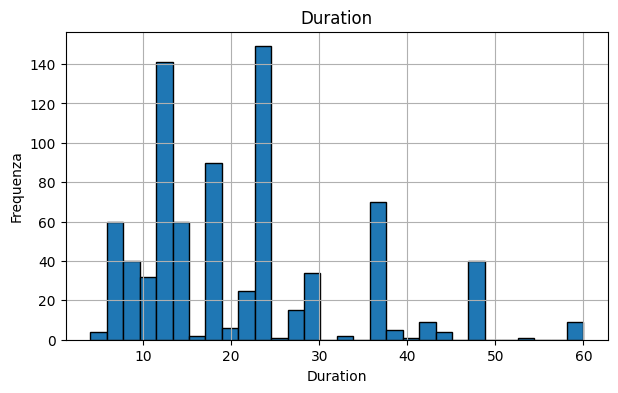

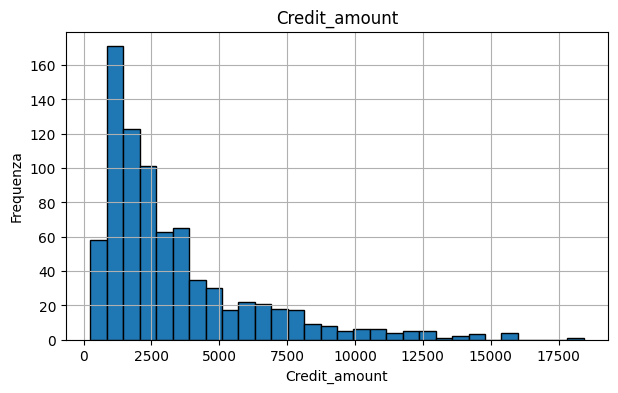

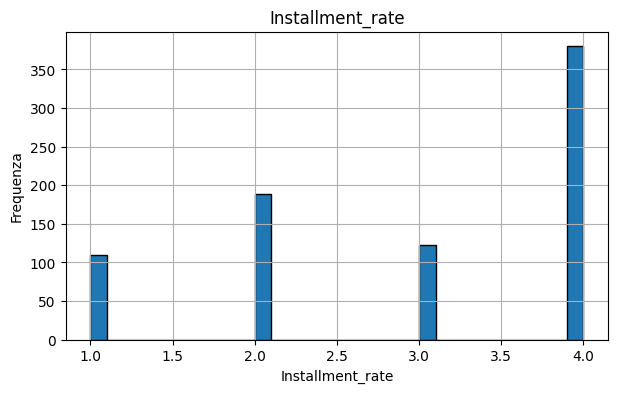

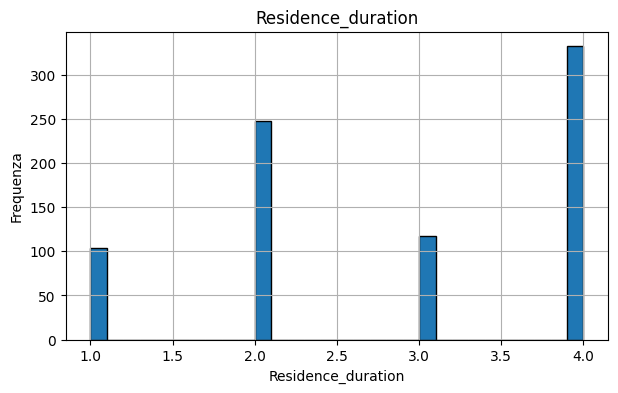

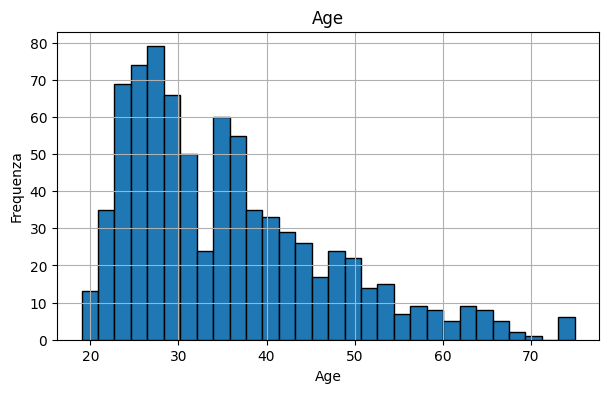

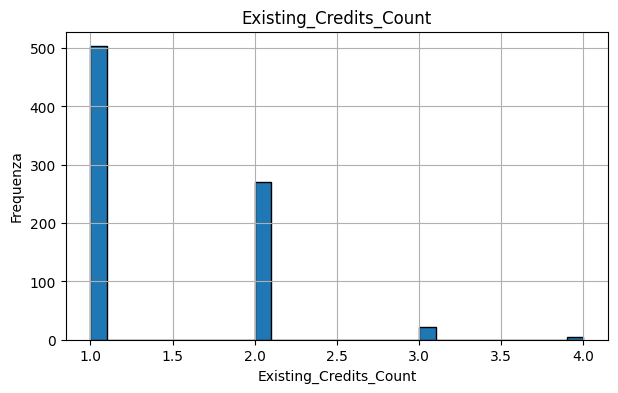

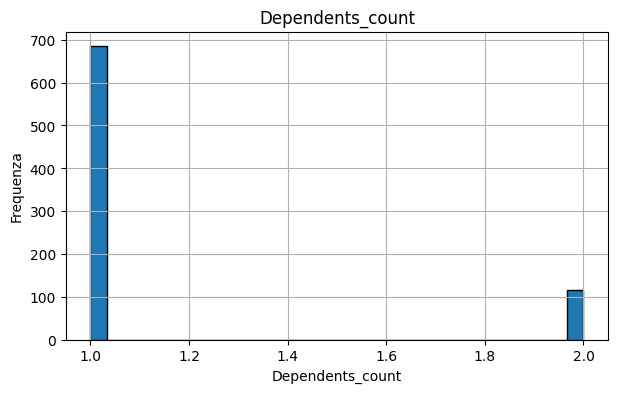

In [37]:
# Istogrammi per variabili numeriche

for col in numerical_cols:
    plt.figure(figsize=(7, 4))  # Resize as needed
    X_train[col].hist(bins=30, edgecolor='black') # Utilizzo direttamente hist di pandas
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Frequenza')
    plt.show()


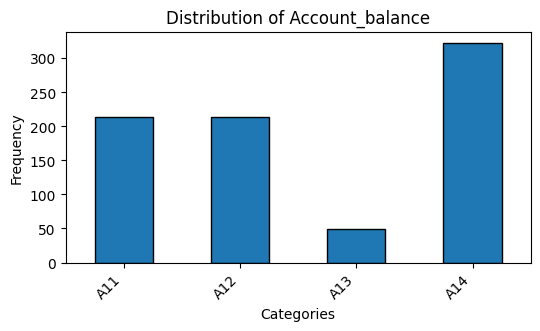

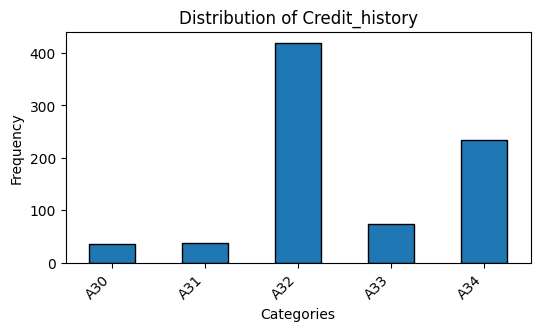

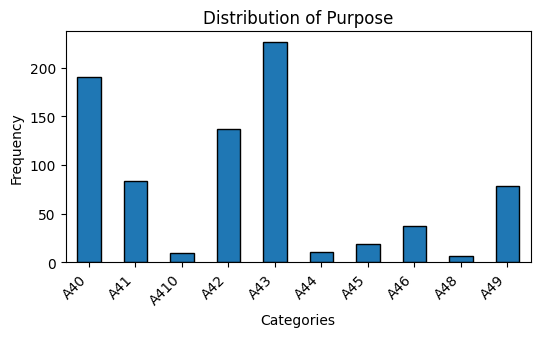

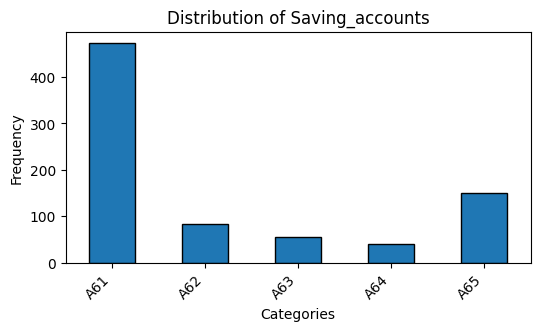

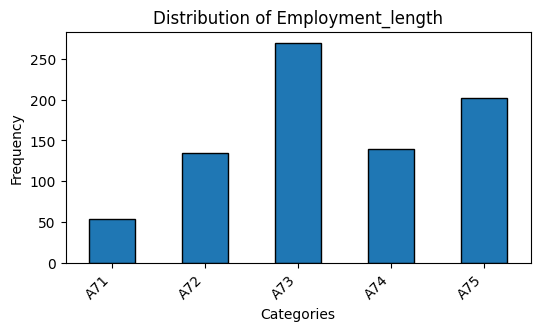

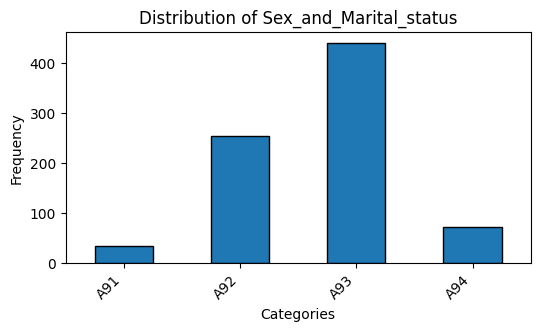

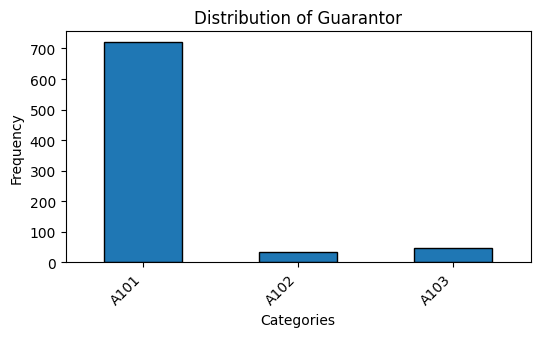

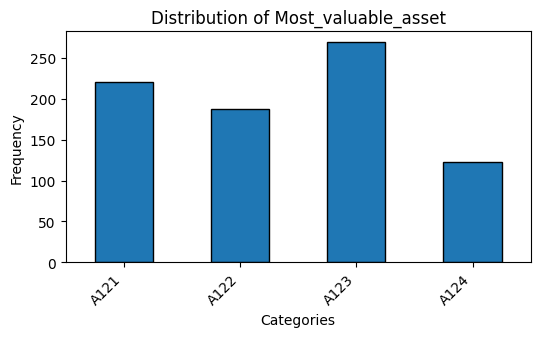

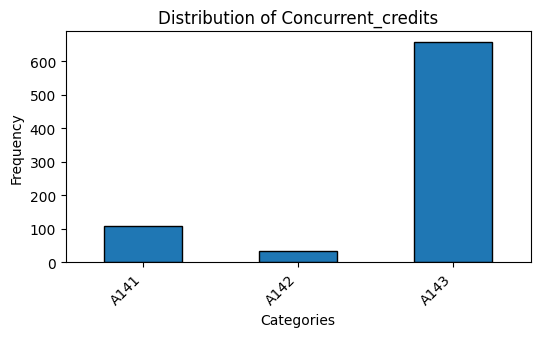

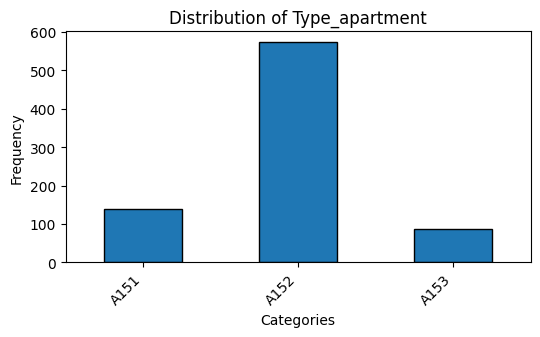

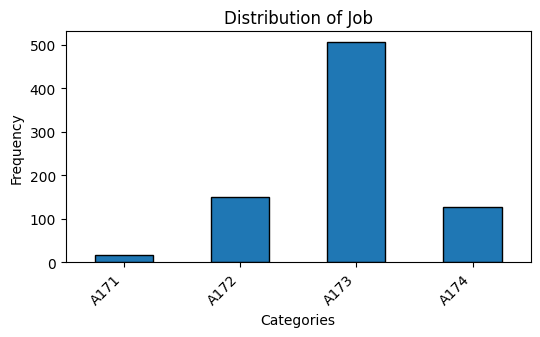

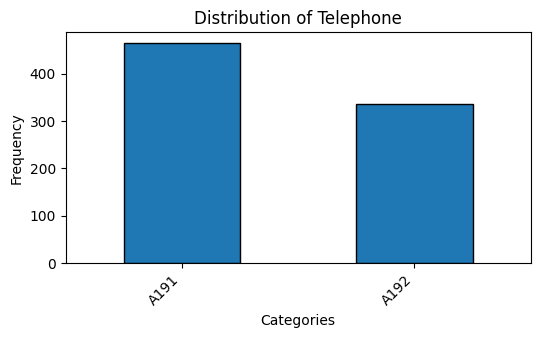

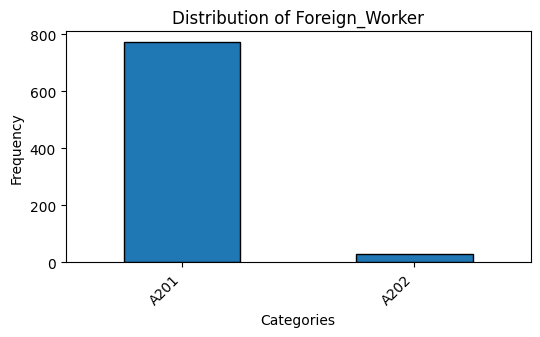

In [39]:
# Grafici a barre per variabili categoriche
for col in categorial_cols:
    plt.figure(figsize=(6, 3))
    X_train[col].value_counts(dropna=False).sort_index().plot(kind='bar', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [15]:
y_train.describe()

count    800.000000
mean       1.301250
std        0.459088
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Credit_Risk, dtype: float64

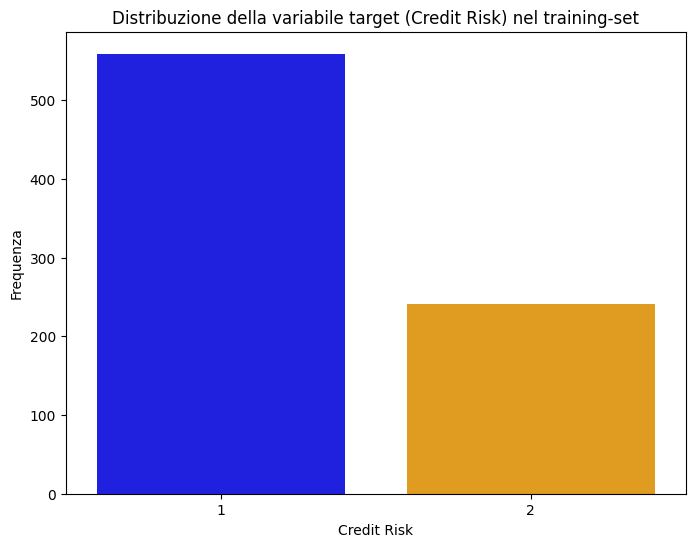

In [19]:
# Plotting the histogram of the target variable 'Credit_Risk'
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, hue=y_train, palette=['blue', 'orange'], legend=False)
plt.title('Distribuzione della variabile target (Credit Risk) nel training-set')
plt.xlabel('Credit Risk')
plt.ylabel('Frequenza')
plt.show()

In [21]:
display("Distribuzione della variabile target (Training Set):")
display(y_train.value_counts()) # Conteggio
display(y_train.value_counts(normalize=True))

'Distribuzione della variabile target (Training Set):'

Credit_Risk
1    559
2    241
Name: count, dtype: int64

Credit_Risk
1    0.69875
2    0.30125
Name: proportion, dtype: float64

#### Il dataset è sbilanciato (70% Classe 1, 30% classe 2)
Lo sbilanciamento può portare a modelli che:
- Hanno un'alta accuratezza complessiva, ma performance scarse sulla classe minoritaria (classe 2 "cattivo pagatore").
- Tendono a predire sempre la classe maggioritaria (classe 1 "buon pagatore").

Ci sono molti dati etichettati come "good credit" (classe 1) e pochi valori etichettati come "bad credit" (classe 2). Questo squilibrio può influenzare la capacità del modello di apprendere i "bad credit".

##### Tecniche di bilanciamento dei dati
1. **Oversampling**: duplicare i record della classe minoritaria.
2. **Undersampling**: eliminare i record della classe maggioritaria.
3. **Pesatura delle classi**: assegnare pesi maggiori alla classe minoritaria.
4. **Metriche di valutazione**: utilizzare metriche come la matrice di confusione, la curva ROC-AUC e la curva di precisione-recall.

##### 1. Oversampling
- Aumentiamo il numero di record della classe minoritaria per bilanciare il dataset.
  - Oversampling semplice: si duplicano i record esistenti della classe minoritaria in modo casuale.
  - SMOTE (Synthetic Minority Over-sampling Technique): si creano nuovi record sintetici della classe minoritaria.

- Vantaggi
  - Non si perdono dati.
  - Non si introduce bias nei dati.
  - Si migliorano le performance del modello sulla classe minoritaria.
- Svantaggi
  - l'oversampling semplice può portare a overfitting.
  - SMOTE può creare record sintetici che non sono realistici.

##### 2. Undersampling
- Eliminiamo i record della classe maggioritaria per bilanciare il dataset.
- Vantaggi
  - Si riduce il tempo di addestramento.
  - Si migliorano le performance del modello sulla classe minoritaria.
- Svantaggi
  - Perdita di dati.
  - Rischio di *underfitting* (il modello non impara abbastanza dalla classe maggioritaria).
  - Se si rimuovono troppi record in maniera randomica, si può perdere informazione utili per l'addestramento.

##### 3. Pesatura delle classi
- Assegnamo pesi maggiori alla classe minoritaria.
- Molti algoritmi di Scikit-learn (es. LogisticRegression, SVC, DecisionTreeClassifier, RandomForestClassifier) hanno un parametro class_weight. Puoi impostarlo a:
-   "balanced": I pesi vengono calcolati automaticamente in modo inversamente proporzionale alla frequenza delle classi.
- Un dizionario: Puoi specificare manualmente i pesi per ogni classe (es. {0: 1, 1: 2} darebbe peso doppio alla classe 1).

- Vantaggi
  - Non si perdono dati.
  - Non si modifica il dataset.
  - Si migliorano le performance del modello sulla classe minoritaria.
- Svantaggi
  - Non sempre efficace quanto il *resampling*.

##### 4. Metriche di valutazione

- **Matrice di confusione**: mostra il numero di veri positivi, falsi positivi, veri negativi e falsi negativi.
- **Curva ROC-AUC**: mostra il tasso di veri positivi rispetto al tasso di falsi positivi.
- **Curva di precisione-recall**: mostra la precisione rispetto al richiamo.
- **F1-score**: media armonica tra precisione e richiamo.
- **Recall**: tasso di veri positivi.
- **Precisione**: tasso di veri positivi rispetto al numero totale di positivi predetti.
- **Accuratezza**: tasso di predizioni corrette rispetto al numero totale di predizioni.
- **Specificità**: tasso di veri negativi rispetto al numero totale di negativi.
- **Sensibilità**: sinonimo di *recall*.


--------------------------

X_train shape: (800, 20)
X_test shape: (200, 20)
y_train shape: (800,)
y_test shape: (200,)


## 2. Analisi Descrittiva

In [17]:
display(X_train.describe())
# Dovremmo osservando le statistiche riuscire ad individuare dei possibili outlier o variaili che hanno una distribuzione molto asimmetrica.

,Credit_Duration_Month,Credit_Amount,Installment_Rate,Residence_Length,Age,Existing_Credits_Count,Dependents_Count
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,21.095000,3360.618750,2.965000,2.846250,35.558750,1.411250,1.143750
std,11.807211,2898.174863,1.122653,1.105277,11.411587,0.578828,0.351056
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1380.000000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2333.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,4154.500000,4.000000,4.000000,42.000000,2.000000,1.000000
max,60.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


       Credit_Duration_Month  Credit_Amount  Installment_Rate  \
count            1000.000000    1000.000000       1000.000000   
mean               20.903000    3271.258000          2.973000   
std                12.058814    2822.736876          1.118715   
min                 4.000000     250.000000          1.000000   
25%                12.000000    1365.500000          2.000000   
50%                18.000000    2319.500000          3.000000   
75%                24.000000    3972.250000          4.000000   
max                72.000000   18424.000000          4.000000   

       Residence_Length          Age  Existing_Credits_Count  Dependents_Count  
count       1000.000000  1000.000000             1000.000000       1000.000000  
mean           2.845000    35.546000                1.407000          1.155000  
std            1.103718    11.375469                0.577654          0.362086  
min            1.000000    19.000000                1.000000          1.000000  
25%      

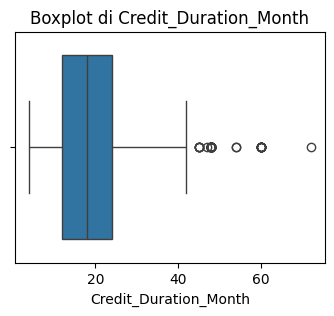

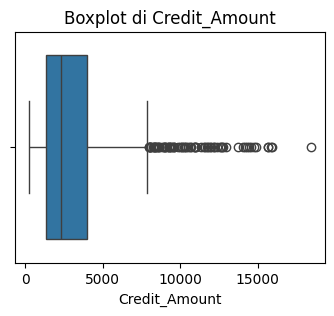

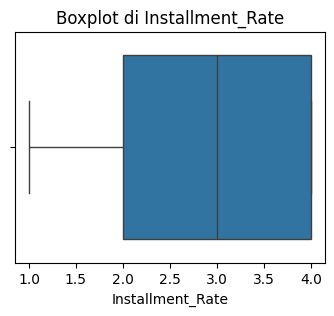

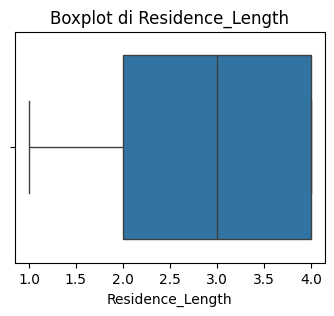

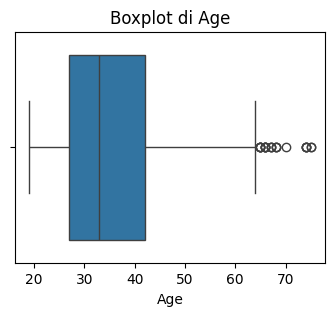

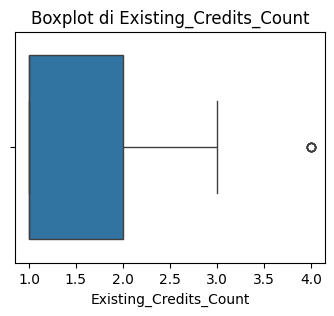

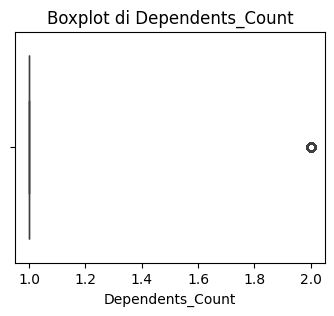

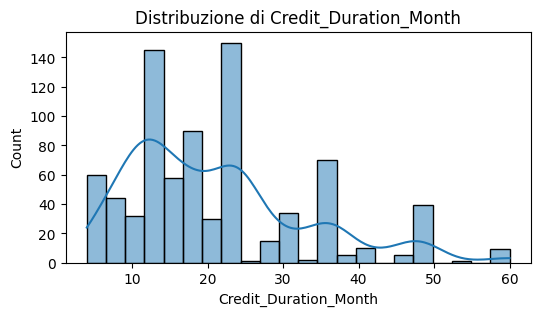

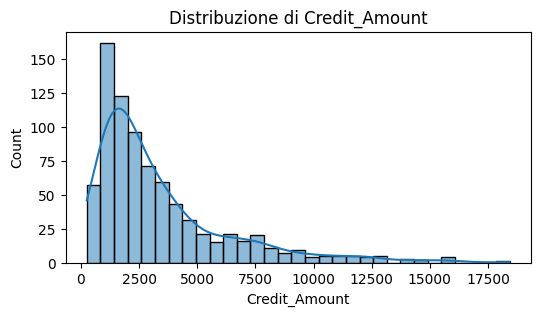

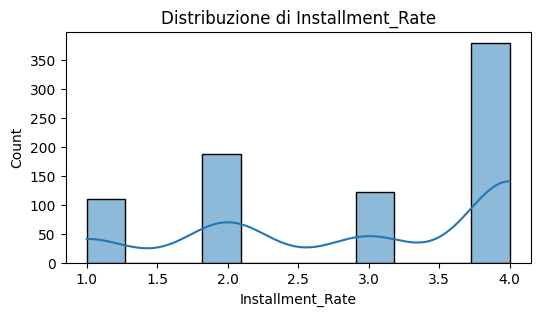

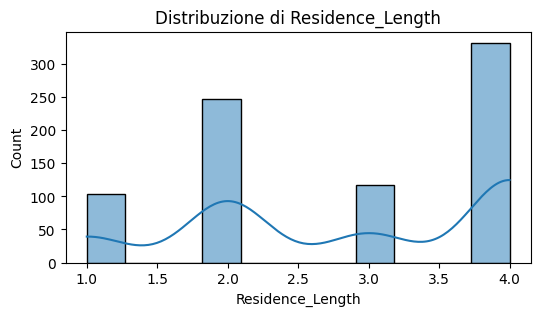

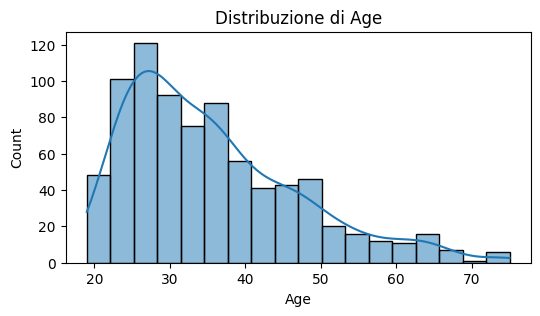

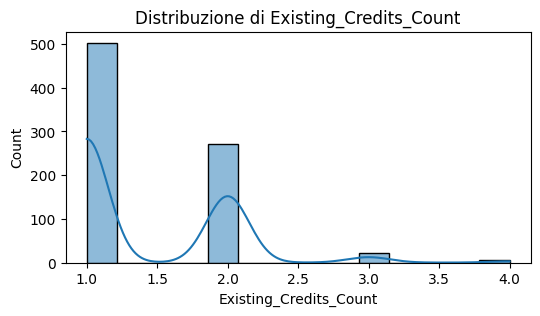

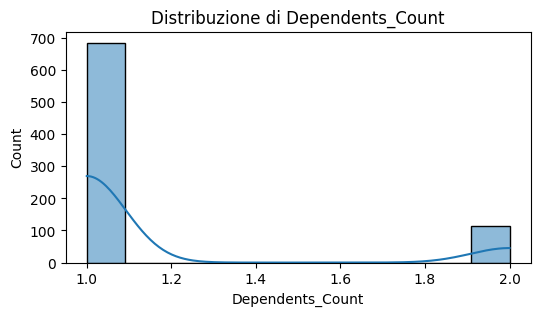

In [28]:
numerical_cols = [
    "Credit_Duration_Month",
    "Credit_Amount",
    "Installment_Rate",
    "Residence_Length",
    "Age",
    "Existing_Credits_Count",
    "Dependents_Count"
]

# Statistiche di base
print(df[numerical_cols].describe())

# Skew (asimmetria)
print("Skew delle variabili numeriche:")
print(df[numerical_cols].skew())

# Boxplot per individuare outlier
for col in numerical_cols:
    plt.figure(figsize=(4,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot di {col}")
    plt.show()

for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(data=X_train, x=col, kde=True)
    plt.title(f"Distribuzione di {col}")
    plt.show()

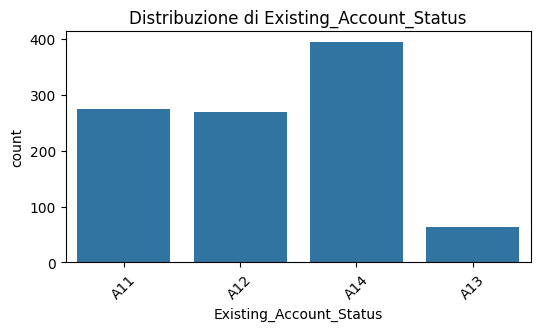

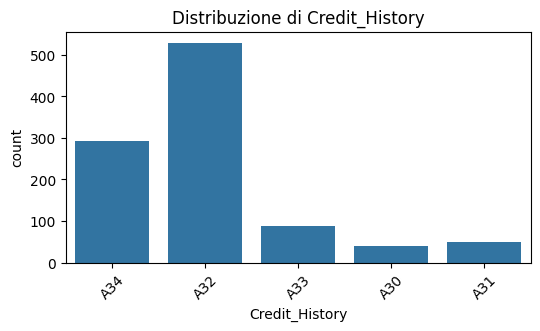

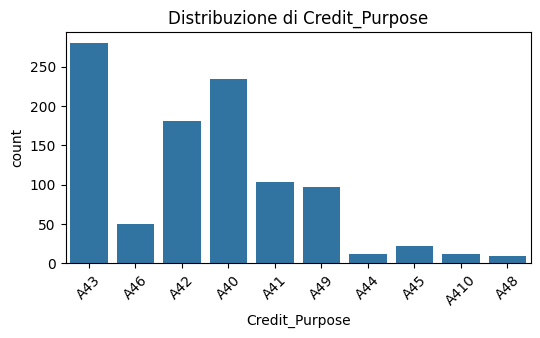

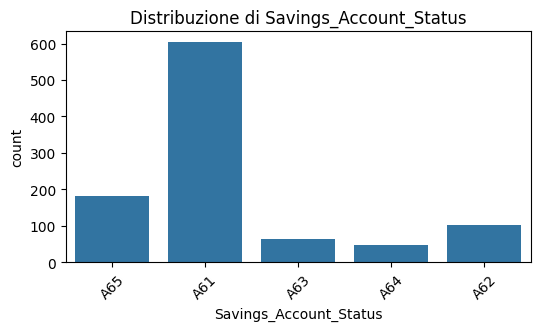

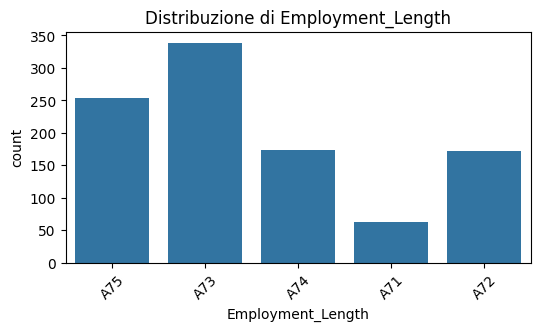

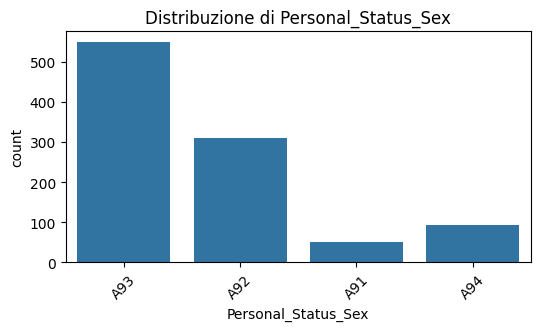

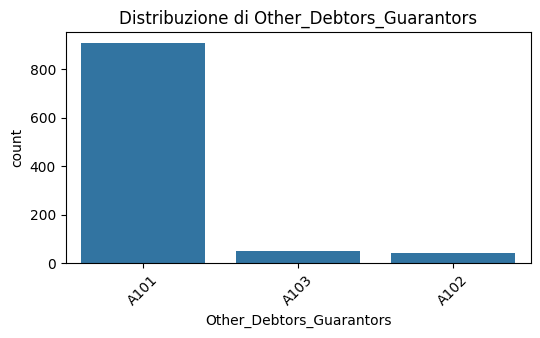

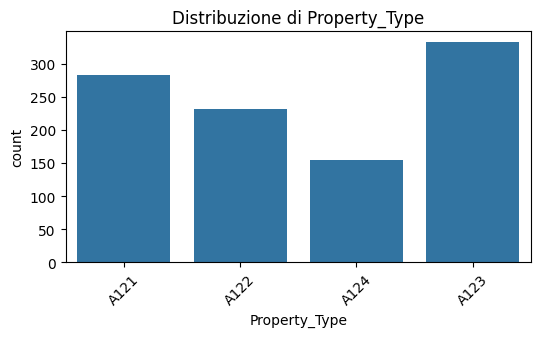

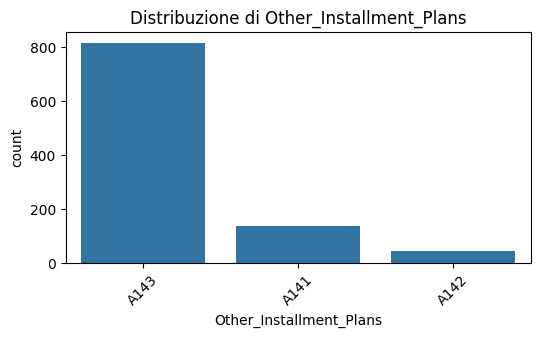

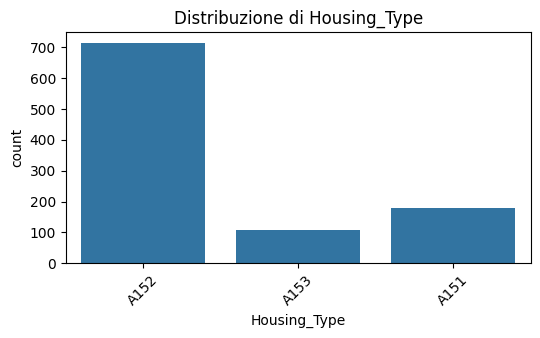

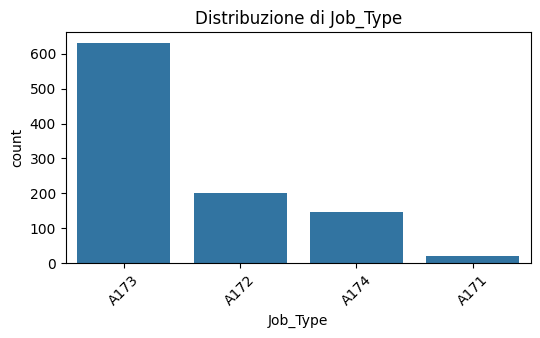

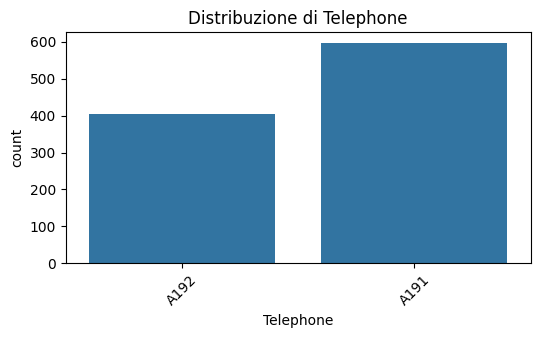

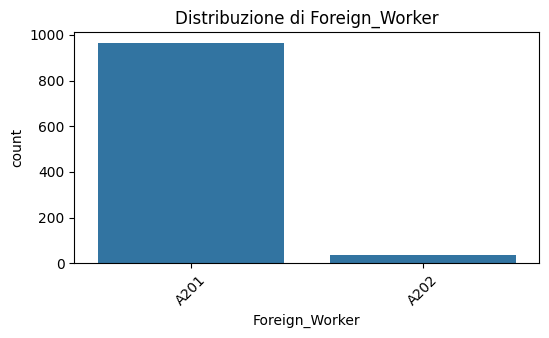

In [27]:
import seaborn as sns

categorical_cols = [
    "Existing_Account_Status",
    "Credit_History",
    "Credit_Purpose",
    "Savings_Account_Status",
    "Employment_Length",
    "Personal_Status_Sex",
    "Other_Debtors_Guarantors",
    "Property_Type",
    "Other_Installment_Plans",
    "Housing_Type",
    "Job_Type",
    "Telephone",
    "Foreign_Worker"
]

for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribuzione di {col}")
    plt.xticks(rotation=45)
    plt.show()

`count`: Mostra il numero di non `missing values`, quindi se risulta 800 significa che non ci sono `missing values`.




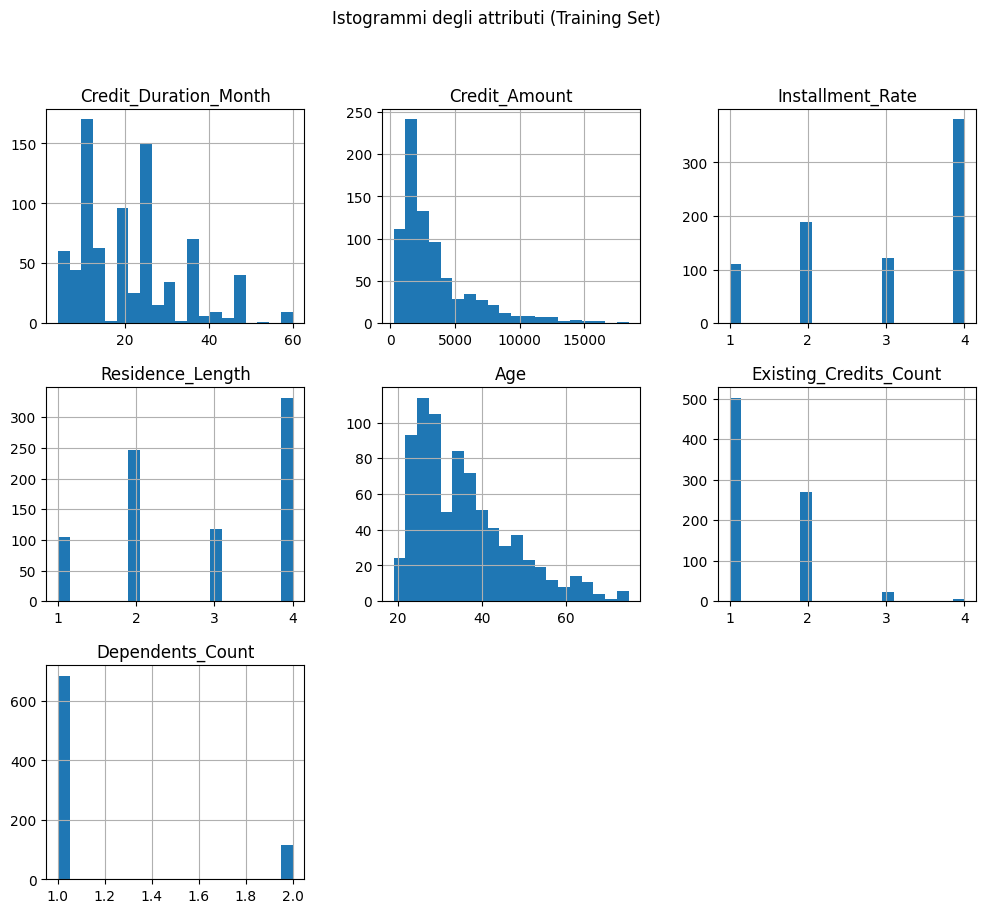

In [ ]:
"""
X_train.hist(figsize = (12, 10), bins=20):
  param:
    figsize(width = 12,height = 10)
    bins = 20 : specifica il numero di intervalli da usare per ogni istogramma.
"""
X_train.hist(figsize=(12, 10), bins=20)
plt.suptitle("Istogrammi degli attributi (Training Set)")
plt.show()

In [ ]:
# Lista delle colonne numeriche continue (da analisi precedente)
continuous_cols = ['Age', 'Credit_Amount']

# Lista delle colonne numeriche discrete/categoriche (da analisi precedente)
discrete_cols = ['Credit_Duration_Month', 'Existing_Credits_Count', 'Dependents_Count', 'Installment_Rate', 'Residence_Length']

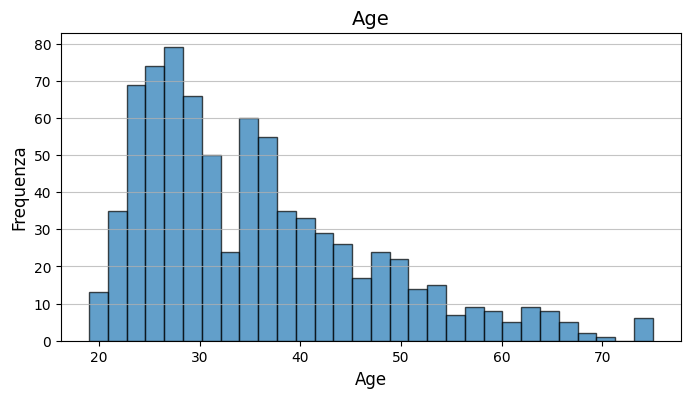

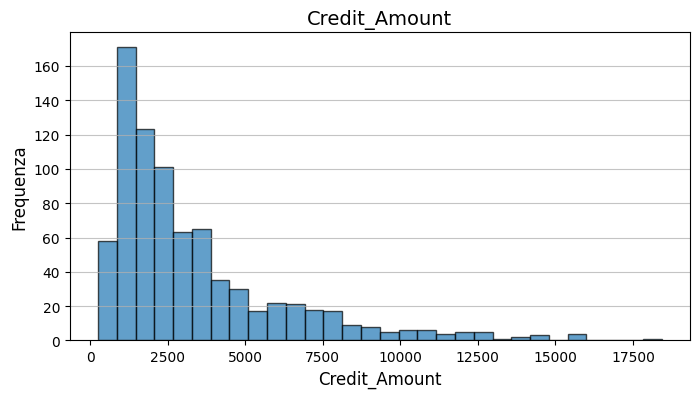

In [ ]:
for col in continuous_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(X_train[col], bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequenza", fontsize=12)
    plt.title(f"{col}", fontsize=14)
    plt.grid(axis='y', alpha=0.75)  # Griglia solo sull'asse y
    plt.show()


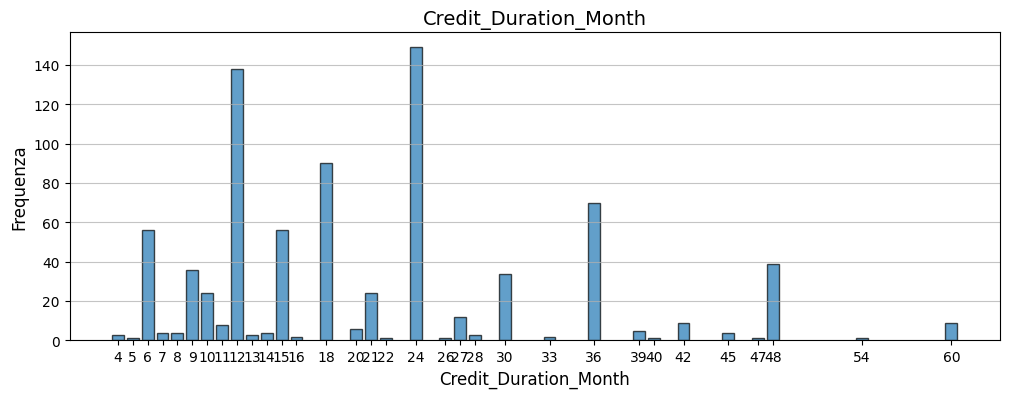

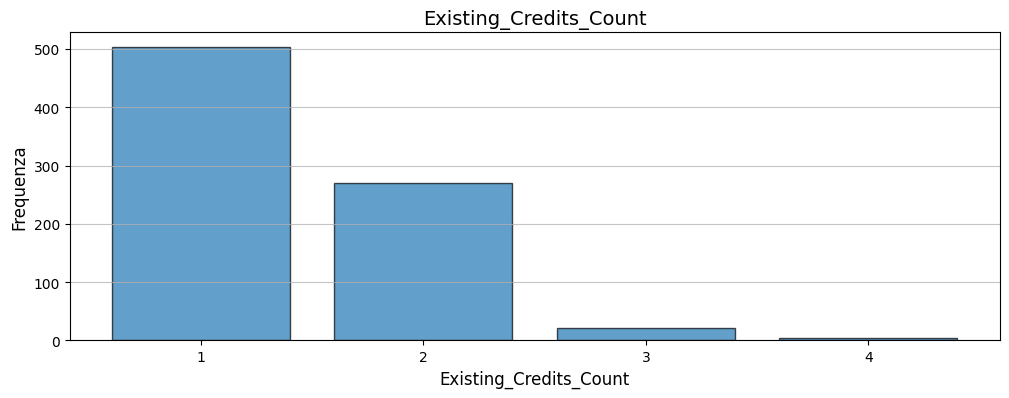

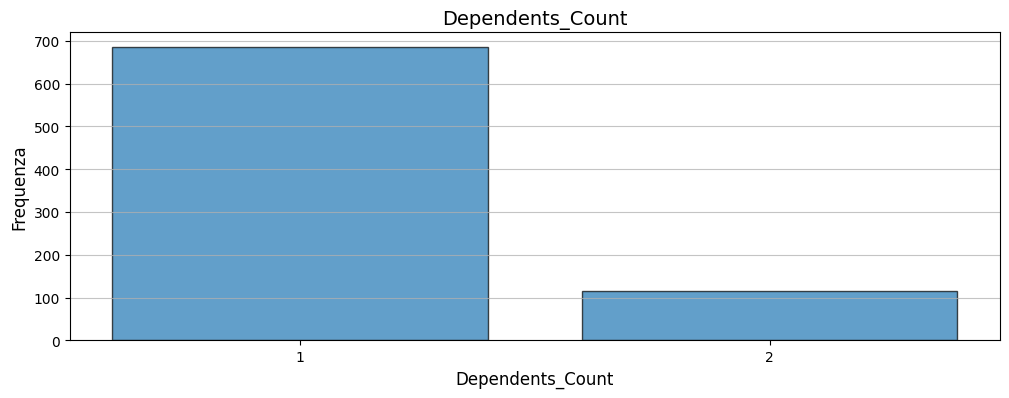

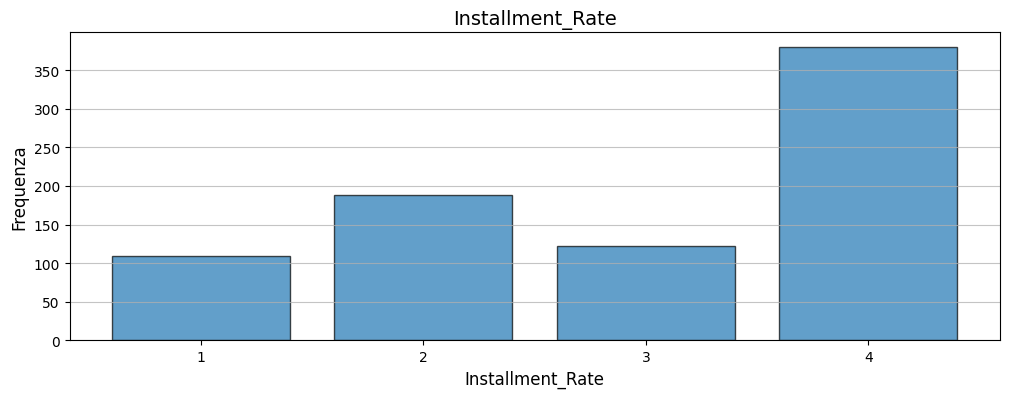

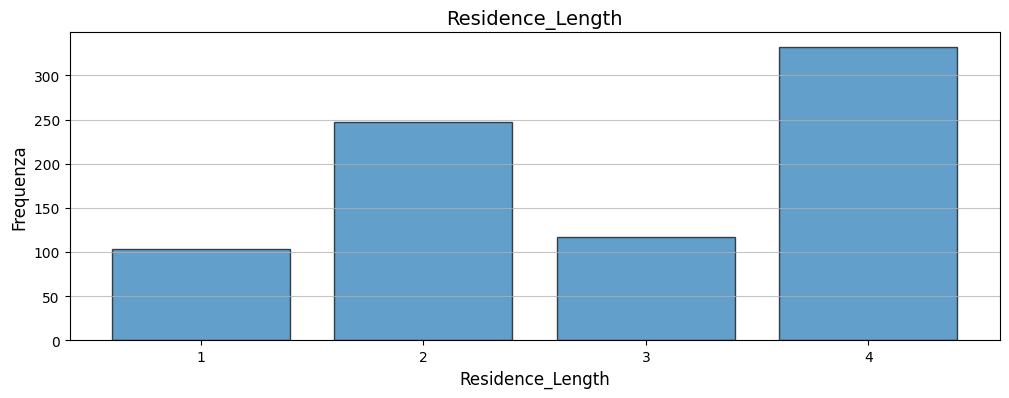

In [ ]:
for col in discrete_cols:
    plt.figure(figsize=(12, 4))
    # Calcola i valori unici e il loro conteggio.  Usa 'dropna=False' per includere ANCHE eventuali NaN
    counts = X_train[col].value_counts(dropna=False).sort_index()
    #Usa bar, e passa i conteggi direttamente.
    plt.bar(counts.index, counts.values, edgecolor='black', alpha=0.7)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequenza", fontsize=12)
    plt.title(f"{col}", fontsize=14)
    plt.xticks(counts.index) #Mostra tutti i valori discreti sull'asse x.
    plt.grid(axis='y', alpha=0.75)
    plt.show()

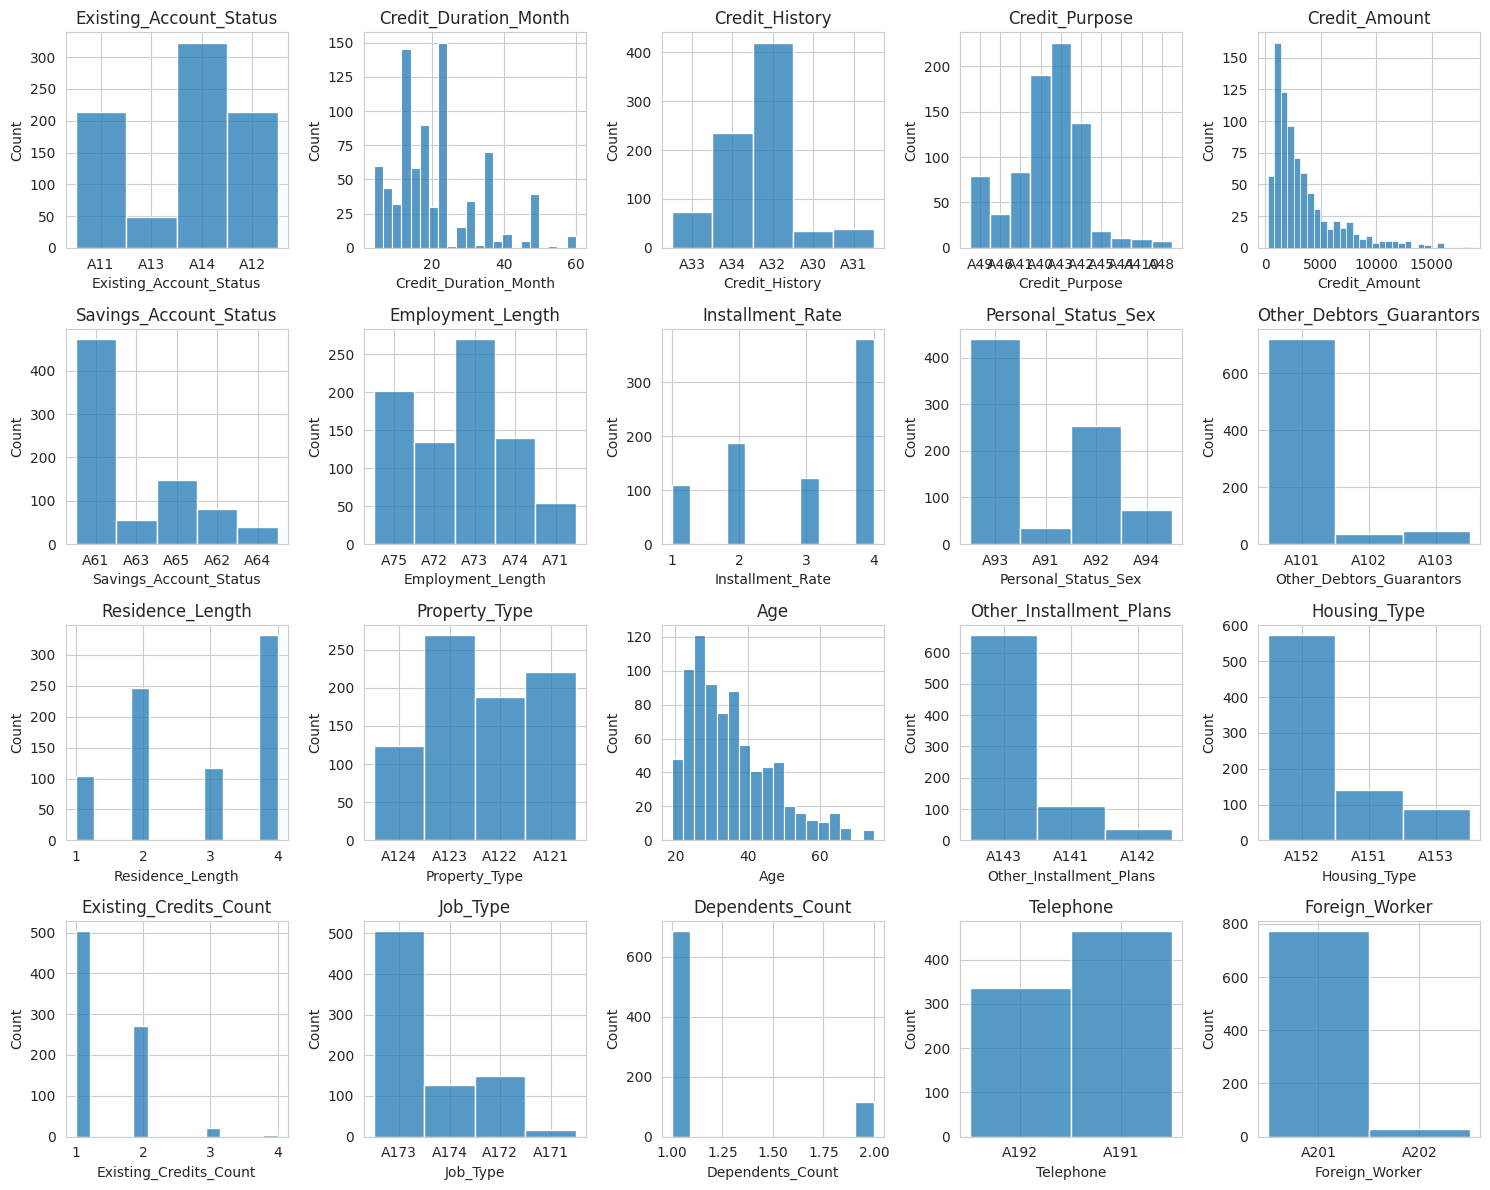

In [ ]:
# --- Istogrammi ---
# Imposta lo stile degli istogrammi (opzionale, ma rende i grafici più belli)
sns.set_style("whitegrid")

# Crea gli istogrammi per tutte le colonne numeriche
plt.figure(figsize=(15, 12))  # Imposta le dimensioni della figura
for i, column in enumerate(X_train.columns):
    plt.subplot(4, 5, i + 1)  # Crea un subplot per ogni colonna (4 righe, 5 colonne)
    sns.histplot(X_train[column], kde=False)  # Crea l'istogramma
    plt.title(column)  # Imposta il titolo
    plt.tight_layout()  # Evita sovrapposizioni
plt.show()

In [ ]:
# Lista delle colonne categoriche (da analisi precedente)
categorical_cols = ['Status_Checking_Acc', 'Credit_History', 'Purpose',
                   'Savings_Acc', 'Years_Employed', 'Status_Sex',
                   'Other_Debtors_Guarantors', 'Property_Type',
                   'Other_Installment_Plans', 'Housing_Type', 'Job_Type',
                   'Telephone', 'Foreign_Worker']

# Analisi delle variabili categoriche
for col in categorical_cols:
    print(f"\n--- Colonna: {col} ---")

    # Conteggio dei valori distinti (incluse le modalità)
    print("\nConteggio valori distinti:")
    print(df[col].value_counts(dropna=False))

    # Visualizzazione con grafico a barre (solo se ci sono meno di 20 categorie)
    if df[col].nunique() <= 20:
        plt.figure(figsize=(8, 4))
        df[col].value_counts(dropna=False).sort_index().plot(kind='bar', edgecolor='black', alpha=0.7)
        plt.title(f"Distribuzione di {col}")
        plt.xlabel("Categoria")
        plt.ylabel("Frequenza")
        plt.xticks(rotation=45, ha="right")  # Ruota le etichette per leggibilità
        plt.grid(axis='y', alpha=0.75)
        plt.show()
    else:
        print("\n(Troppe categorie per visualizzare il grafico a barre)")


--- Colonna: Status_Checking_Acc ---

Conteggio valori distinti:


KeyError: 'Status_Checking_Acc'

In [ ]:
print("Valori mancanti per colonna (Training Set):")
print(X_train.isnull().sum())

Valori mancanti per colonna (Training Set):
Existing_Account_Status     0
Credit_Duration_Month       0
Credit_History              0
Credit_Purpose              0
Credit_Amount               0
Savings_Account_Status      0
Employment_Length           0
Installment_Rate            0
Personal_Status_Sex         0
Other_Debtors_Guarantors    0
Residence_Length            0
Property_Type               0
Age                         0
Other_Installment_Plans     0
Housing_Type                0
Existing_Credits_Count      0
Job_Type                    0
Dependents_Count            0
Telephone                   0
Foreign_Worker              0
dtype: int64


Non ci sono valori mancanti nelle colonne. In tal caso avremmo dovuto decidere se eliminare le righe o colonne ecc.

In [ ]:
print("Distribuzione della variabile target (Training Set):")
print(y_train.value_counts()) # Conteggio
print(y_train.value_counts(normalize=True))

Distribuzione della variabile target (Training Set):
Credit_Risk
1    559
2    241
Name: count, dtype: int64
Credit_Risk
1    0.69875
2    0.30125
Name: proportion, dtype: float64


Abbiamo un problema: La **classe 1** (69.9%) è molto più frequente della **classe 2**. Potrebbe succedere che il modello impari bene (alta accuratezza) la classe 1,al contrario sbagliando di frequente (basa accuratezza) l'altra classe.